In [145]:
!pip install kaggle

In [146]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [147]:
# download dataset
!kaggle competitions download -c cifar-10

cifar-10.zip: Skipping, found more recently modified local copy (use --force to force download)


In [148]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [149]:
# extracting the compessed dataset
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [150]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [151]:
# for extracting .7z files
!pip install py7zr

In [152]:
import py7zr

archive = py7zr.SevenZipFile('/content/train.7z', mode='r')
archive.extractall()     #archive.extractall(path='/content/Training Data')
archive.close()

In [168]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [169]:
# importing required libraries
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [170]:
filenames = os.listdir('/content/train')
type(filenames)

list

In [171]:
len(filenames)

50000

In [172]:
print(filenames[0:5])
print(filenames[-5:])

['36387.png', '36383.png', '6405.png', '29584.png', '42042.png']
['8568.png', '31496.png', '37389.png', '22854.png', '11358.png']


In [173]:
# labels
labels_df = pd.read_csv('/content/trainLabels.csv')

In [174]:
labels_df.shape

(50000, 2)

In [175]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [176]:
labels_df.head(10)

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
5,6,automobile
6,7,bird
7,8,horse
8,9,ship
9,10,cat


In [177]:
labels_df.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [178]:
labels_df[labels_df['id'] == 3580]

,id,label
3579,3580,ship


In [179]:
labels_df['label'].value_counts()

frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: label, dtype: int64

In [180]:
labels_df['label']

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

In [181]:
# encoding the labels to numeric form

labels_dictionary = {'airplane':0, 'automobile':1, 'bird':2, 'cat':3, 'deer':4, 'dog':5, 'frog':6, 'horse':7, 'ship':8, 'truck':9}

labels = [labels_dictionary[i] for i in labels_df['label']]

In [182]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


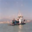

In [183]:
# displaying sample images
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/train/3580.png')
cv2_imshow(img)

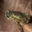

In [184]:
img = cv2.imread('/content/train/8035.png')
cv2_imshow(img)

In [185]:
labels_df[labels_df['id'] == 8035]

,id,label
8034,8035,frog


In [186]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [187]:
# list of image IDs
id_list = list(labels_df['id'])

In [188]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


**Image Preprocessing**

In [189]:
# converting images to numpy arrays

train_data_folder = '/content/train/'

data = []

for id in id_list:

  image = Image.open(train_data_folder + str(id) + '.png')
  image = np.array(image)
  data.append(image)

In [190]:
type(data)

list

In [191]:
len(data)

50000

In [192]:
type(data[0])

numpy.ndarray

In [193]:
data[0].shape

(32, 32, 3)

In [194]:
data[0]     # RGB values of each pixel

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [195]:
# convert image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [196]:
type(X)

numpy.ndarray

In [197]:
print(X.shape)
print(Y.shape)

(50000, 32, 32, 3)
(50000,)


**Train Test Split**

In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [199]:
print(X.shape, X_train.shape, X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [200]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [201]:
X_train_scaled

array([[[[0.13333333, 0.14117647, 0.16862745],
         [0.14509804, 0.14509804, 0.2       ],
         [0.17254902, 0.17254902, 0.25098039],
         ...,
         [0.24313725, 0.28627451, 0.36470588],
         [0.20392157, 0.24705882, 0.3254902 ],
         [0.17647059, 0.22352941, 0.30196078]],

        [[0.1372549 , 0.1372549 , 0.14509804],
         [0.13333333, 0.13333333, 0.15686275],
         [0.13333333, 0.12941176, 0.16862745],
         ...,
         [0.22745098, 0.27058824, 0.34901961],
         [0.19607843, 0.23529412, 0.31372549],
         [0.18431373, 0.22745098, 0.30588235]],

        [[0.13333333, 0.12941176, 0.1372549 ],
         [0.12941176, 0.1254902 , 0.14117647],
         [0.12941176, 0.1254902 , 0.14901961],
         ...,
         [0.25882353, 0.30196078, 0.38039216],
         [0.2       , 0.24313725, 0.32156863],
         [0.20784314, 0.25098039, 0.32941176]],

        ...,

        [[0.1254902 , 0.1254902 , 0.14901961],
         [0.1254902 , 0.12156863, 0.14509804]

In [202]:
X_train[0]

array([[[34, 36, 43],
        [37, 37, 51],
        [44, 44, 64],
        ...,
        [62, 73, 93],
        [52, 63, 83],
        [45, 57, 77]],

       [[35, 35, 37],
        [34, 34, 40],
        [34, 33, 43],
        ...,
        [58, 69, 89],
        [50, 60, 80],
        [47, 58, 78]],

       [[34, 33, 35],
        [33, 32, 36],
        [33, 32, 38],
        ...,
        [66, 77, 97],
        [51, 62, 82],
        [53, 64, 84]],

       ...,

       [[32, 32, 38],
        [32, 31, 37],
        [33, 33, 38],
        ...,
        [41, 38, 45],
        [34, 31, 38],
        [36, 32, 40]],

       [[33, 31, 36],
        [32, 30, 36],
        [34, 32, 37],
        ...,
        [37, 35, 40],
        [32, 29, 35],
        [30, 28, 33]],

       [[37, 32, 35],
        [37, 32, 36],
        [37, 33, 36],
        ...,
        [49, 47, 49],
        [47, 45, 48],
        [58, 56, 58]]], dtype=uint8)

**Building the Convolutional Neural Network**

In [203]:
import tensorflow as tf
from tensorflow import keras

In [204]:
num_of_classes = 10

In [215]:
# create a Sequential model
model = keras.Sequential([
    # 1st convolution block
    keras.layers.Conv2D(64, (3,3), padding='same', input_shape=(32, 32, 3)),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Conv2D(64, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 2nd convolution block
    keras.layers.Conv2D(128, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 3rd convolution block
    keras.layers.Conv2D(256, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(256, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(256, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 4th convolution block
    keras.layers.Conv2D(512, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(512, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(512, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # 5th convolution block
    keras.layers.Conv2D(512, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(512, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(512, (3,3), padding='same'),
    keras.layers.Activation('relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    # dropout layer
    keras.layers.Dropout(0.5),
    # flatten layer
    keras.layers.Flatten(),
    # dense layers
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(num_of_classes, activation='softmax')
])

model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_234 (Conv2D)         (None, 32, 32, 64)        1792      
                                                                 
 activation_199 (Activation  (None, 32, 32, 64)        0         
 )                                                               
                                                                 
 batch_normalization_166 (B  (None, 32, 32, 64)        256       
 atchNormalization)                                              
                                                                 
 dropout_120 (Dropout)       (None, 32, 32, 64)        0         
                                                                 
 conv2d_235 (Conv2D)         (None, 32, 32, 64)        36928     
                                                                 
 activation_200 (Activation  (None, 32, 32, 64)      

In [216]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [217]:
# train the neural network
model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
1125/1125 [==============================] - 48s 36ms/step - loss: 1.8890 - accuracy: 0.3038 - val_loss: 1.8779 - val_accuracy: 0.3540
Epoch 2/20
1125/1125 [==============================] - 40s 36ms/step - loss: 1.3893 - accuracy: 0.4909 - val_loss: 1.4163 - val_accuracy: 0.5215
Epoch 3/20
1125/1125 [==============================] - 40s 36ms/step - loss: 1.1439 - accuracy: 0.5957 - val_loss: 1.1856 - val_accuracy: 0.5957
Epoch 4/20
1125/1125 [==============================] - 40s 36ms/step - loss: 1.0050 - accuracy: 0.6520 - val_loss: 0.9962 - val_accuracy: 0.6678
Epoch 5/20
1125/1125 [==============================] - 41s 36ms/step - loss: 0.8961 - accuracy: 0.6976 - val_loss: 1.3885 - val_accuracy: 0.5845
Epoch 6/20
1125/1125 [==============================] - 40s 36ms/step - loss: 0.8126 - accuracy: 0.7274 - val_loss: 0.8860 - val_accuracy: 0.7180
Epoch 7/20
1125/1125 [==============================] - 42s 38ms/step - loss: 0.7349 - accuracy: 0.7552 - val_loss: 0.8358 -

In [218]:
# testing accuracy
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

313/313 [==============================] - 4s 10ms/step - loss: 0.5456 - accuracy: 0.8402
Test Accuracy = 0.8402000069618225
